<a href="https://colab.research.google.com/github/Aman-7745/Machine_Learning/blob/main/Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SimpleLinearRegression

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv("https://raw.githubusercontent.com/Aman-7745/Machine_Learning/2060c908a9cbb7af14c23cd162997af1f852ebdb/Regression/DataSet/placement.csv")


In [97]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


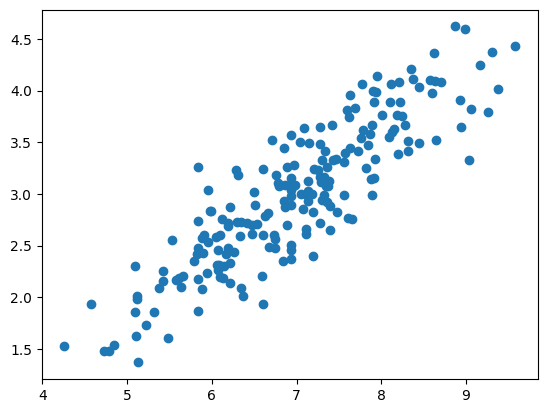

In [98]:
plt.scatter(df['cgpa'],df['package'])

In [99]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2 , random_state =2)

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [105]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

In [106]:
X_test.iloc[2]

,182
cgpa,5.88


Text(0, 0.5, 'package(lpa)')

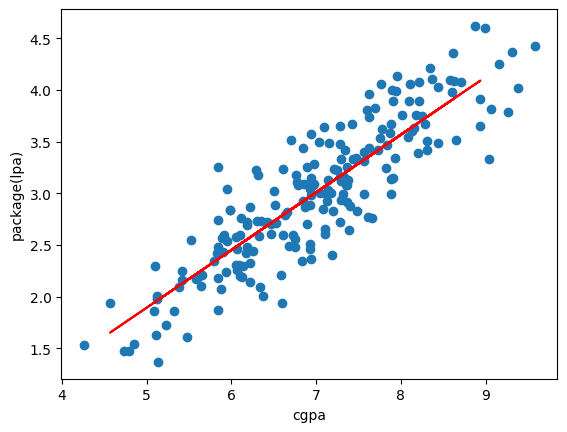

In [107]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test,lr.predict(X_test) ,color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package(lpa)')

In [108]:
m = lr.coef_
c = lr.intercept_

In [109]:
m
c

np.float64(-0.8961119222429144)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
y_pred = lr.predict(X_test)

In [112]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [113]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score", r2_score(y_test,y_pred))


MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
r2_score 0.780730147510384


Adjusted_R2Score

In [114]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(size = len(df))

In [115]:
new_df1 = new_df1[['cgpa','random_feature', 'package']]

In [116]:
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.446171,3.26
1,5.12,0.835550,1.98
2,7.82,0.869430,3.25
3,7.42,0.419372,3.67
4,6.94,0.624635,3.57


Text(0, 0.5, 'package')

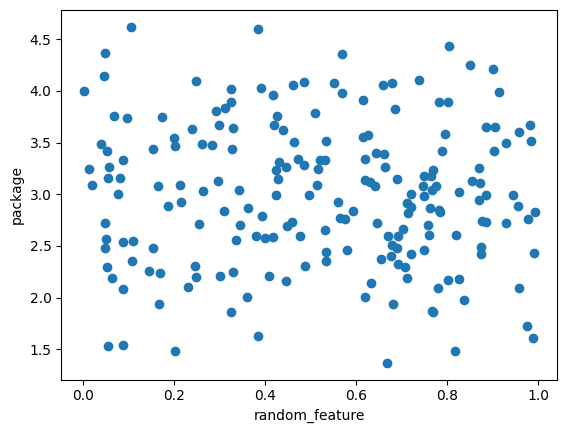

In [117]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [118]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state =5)

In [120]:
lr = LinearRegression()

In [121]:
lr.fit(X_train,y_train)

LinearRegression()

In [122]:
y_pred = lr.predict(X_test)

In [123]:
print("R2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7491933905335036


Adjusted R2 score

In [124]:
1-((1-r2)*(40-1)/(40-1-2))

0.7356362765082876

Addition of IQ

In [125]:
new_df2  =  df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

In [126]:
new_df2.head()

,cgpa,package,iq
0,6.89,3.26,2.36
1,5.12,1.98,2.68
2,7.82,3.25,4.15
3,7.42,3.67,4.57
4,6.94,3.57,4.57


In [127]:
new_df2.sample(5)

,cgpa,package,iq
19,7.48,2.83,3.83
102,5.13,1.37,0.27
123,5.10,2.30,2.80
182,5.88,2.08,2.98
116,9.04,3.33,3.33


Text(0, 0.5, 'package(lpa)')

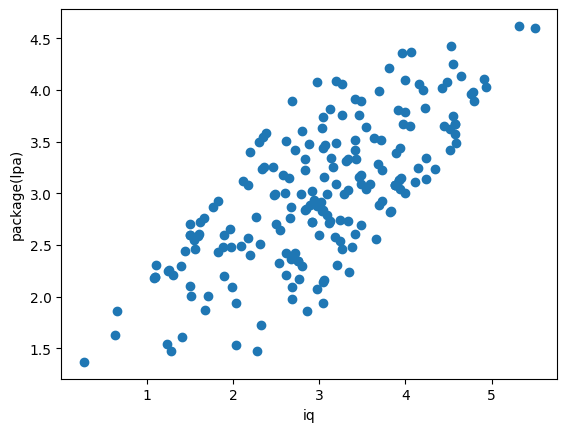

In [129]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('package(lpa)')

In [131]:
X_train,X_test,y_train,y_test= train = train_test_split(X,y,test_size =.2, random_state =2)

In [133]:
lr = LinearRegression()

In [134]:
lr.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(X_test)

In [138]:
print("R2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7804825024844193


In [139]:
1- ((1-r2)*(40-1)/(40-1-2))

0.7686166918079014